## Programming for Data Analysis

Course: HDip in Computing in Data Analytics  
Module: Programming for Data Analysis  
Author: Stefania Verduga  
***

## Table of Contents

1. [Description](#Description)
- 1.1 [Technology and Libraries used for this project](#Technology-and-Libraries-used-for-this-project)
2. [Objectives of the Project](#Objectives-of-the-Project)
3. [Analysis](#Analysis)
- 3.1 [Extracting data from datasets](#Extracting-data-from-datasets)
    - 3.1.1 [CO2](#CO2)
    - 3.1.2 [Temperature](#Temperature)
    - 3.1.3 [Temperature and CO2 Evolution](#Temperature-and-CO2-Evolution)
- 3.2 [Examine one other feature: CH4](#Examine-one-other-feature:-CH4)
- 3.3 [Irish Context: Rainfall](#Irish-Context:-Rainfall)
- 3.4 [Merging data](#Merging-data)
- 3.5 [Linear Regressions](#Linear-Regressions)
- 3.6 [Correlation Matrix and Heatmap](#Correlation-Matrix-and-Heatmap)
- 3.7 [Temperature Prediction](#Temperature-Prediction)
4. [Conclusion](#Conclusion)
5. [References](#References)
***

## 1. Description

The project is an Analysis of paleo-present climate data. The following steps need to be done in order to carry out it succesfully:
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage).
- Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice- coverage).
***

### 1.1 Technology and Libraries used for this project

This project was developed using Python [01] and the following packages:

- **Numpy**: used to perform a wide variety of mathematical operations on arrays. NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation. [02]
- **Pandas**: used to perform data manipulation and analysis.Pandas is a Python library for data analysis. It is built on top of two core Python libraries—matplotlib for data visualization and NumPy for mathematical operations. Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code. [03]
- **Matplotlib**: used for data visualization and graphical ploting. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [04]
- **Seaborn**: built on top of matplotlib with similar functionalities. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [05]
- **Sklearn**: is a library in Python that provides many learning algorithms. It’s built upon some of the technology like NumPy, pandas, and Matplotlib. The functionality that scikit-learn provides include:
    - Regression, including Linear and Logistic Regression.
    - Classification, including K-Nearest Neighbors.
    - Clustering, including K-Means and K-Means++.
    - Model selection.
    - Preprocessing, including Min-Max Normalization. [06]

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

***
## 2. Objectives of the project

The objective of this project is to analyze the relationship between CO2 levels and temperature. According to the Global Monitoring Laboratory NOAA, "*Since the beginning of the atmospheric measurement record, annually-averaged CO2 concentrations have risen without interruption. This continuous increase is driven by the burning of fossil fuels. The two significant exceptions to this steady increase in emissions are both attributable to major global economic disruptions: emissions fell from 2008 to 2009 as a result of the global economic recession, and from 2019 to 2020 due to the COVID pandemic. These small decreases are not large enough to significantly slow the growth of atmospheric CO2 concentrations*"[07].

The CO2 is the most important greenhouse gas, which absorbs and radiates heat. The greenhouse gases absorb heat from the surface of the Earth and release it in all directions. Without CO2, the natural greenhouse effect of the Earth would be too weak to keep the global surface temperature above freezing. However, by adding more CO2 to the atmosphere as it is currently happening, we are supercharging the natural greenhouse effect, causing global temperature to rise [08].

For this project, I have also analised two other variables such as CH4 and the Rainfall level in Ireland.
The atmospheric methane is another relevant greenhouse gas and a great indicator of climate change and the variability of the temperature along the years. Over the past 650 kyr, the record of ice cores indicates that their abundance has ranged from ∼350 p.p.b.v. during glacial periods to ∼800 p.p.b.v. during interglacials. [09]

In the case of the Rainfall time series for Ireland from 1711 to 2016, we can find out that the most recent decade (2006–2015) is found to be the wettest in over 300 years. The time series also reveals statistically significant multi-centennial trends in winter (increasing) and summer (decreasing) seasonal precipitation. [10]
***

## 3. Analysis
To carry out the analysis of the evolution of temperature and CO2 over time in order to predict the behavior of these variables in the future, I will use the following data:

- CO2 - Bereiter et al. (2024). Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present.
- Temperature - Temperature Data from Jouzel - EPICA Dome C - 800KYr Deuterium Data and Temperature Estimates
- CH4 - Loulergue, L., Schilt, A., Spahni, R. et al. (2008). Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years
- Ireland Rainfall - Composite Rainfall Time Series from 1711-2016 for Ireland.
- More current temperature data - Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies

### 3.1 Extracting data from datasets

### 3.1.1 CO2
All that we know about atmospheric CO2 concentrations is based on the analysis of atmospheric air trapped in Antarctic ice cores. The EPICA (European Project for Ice Coring in Antarctica) Dome C (EDC) ice core provides the oldest samples of atmospheric air, allowing the reconstruction of CO2 concentrations as far back as 800 kyr B.P. (thousand years before present, where present is defined as 1950) [Lüthi et al., 2008].

The first step in order to analise this data is to read the data from the Bereiter dataset; as this dataset is saved in excel format, I used the function read_excel in order to gain access to the file. After dropping all the NaN values and extracting the two columns of our interest, I plotted a graph in order to better understand the behavior of this variable.

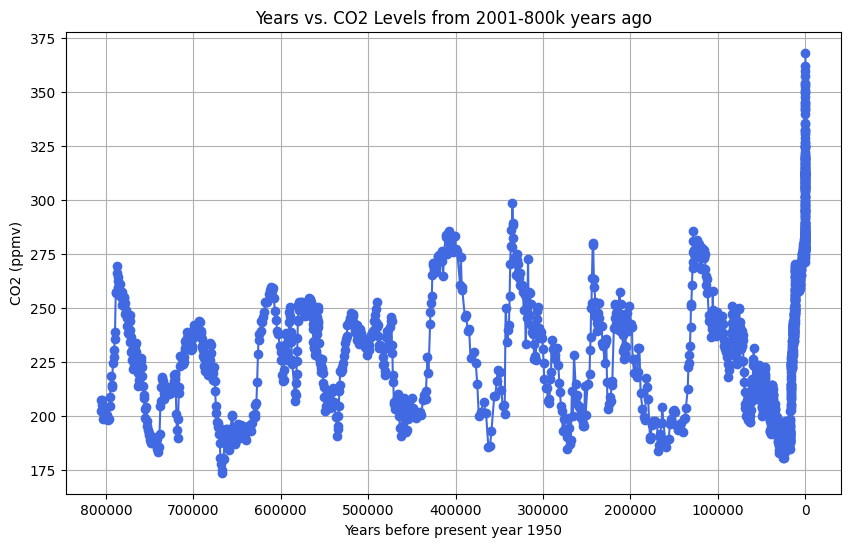

In [2]:
# Read data from Bereiter Supplementary data
co2_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite', skiprows=14)

# Handling NaN values
co2_df.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extracting data from the first two columns, years and CO2
years = co2_df['Gasage (yr BP) ']
co2 = co2_df['CO2 (ppmv)']

# Plotting the CO2 data
plt.figure(figsize=(10, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels from 2001-800k years ago')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

In the graph I have inverted the X axis, in this case of the years, to make it visibly easier to understand, since in this case year 0 refers to the most recent year of the sample, 1950. 
We can see how CO2 levels remain in a range of 175 and 275 ppmv during the years 800k and 450K and then rise to a range between 180 and 300 ppmv. But most striking of all is the sharp increase in CO2 levels that has occurred from the 30K years to the present, reaching CO2 values of almost 375 ppmv.

### 3.1.2 Temperature
The temperature data include parameters of ice cores with a geographic location of Antarctica. The time period coverage is from 801642 to -50 in calendar years before present (BP). This data, reveals important information about the changes in the climate during past years, and especially the temperature.

As in the previous variable, the first thing for the analysis is to read the data and drop the NaN values. I this case, we can see that the temperature is given in Fahrenheit degrees, so I converted them in Celsius degrees. 
In order to do so, I defined a function 'fahrenheit_to_celsius' that converts a temperature value from Fahrenheit to Celsius using the formula (F - 32) * 5 / 9, where F is the temperature in Fahrenheit.
The 'fahrenheit_to_celsius' function is applied to the 'temp' column of the DataFrame and creates a new column 'Temperature_Celsius' to store the converted values.

In [3]:
# Read data from Jouzel - EpicaDC
temperature_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/epicaDC.deuttemp.EDC3-AICC.xls')

# Handling NaN values
temperature_df.dropna(subset=['EDC3béta', 'temp'], inplace=True)

# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(f):
    return (f - 32) * 5 / 9

# Apply the function to the specified column from the DataFrame
temperature_df['Temperature_Celsius'] = temperature_df['temp'].apply(fahrenheit_to_celsius)

# Show up the final DataFrame
print(temperature_df)

       bag     ztop      EDC3béta       AICC2012  deutfinal   temp   
0        1     0.00     -50.00000     -55.000000        NaN  218.3  \
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  Temperature_Celsius  
0         3.105321           103.500000  
1         3.104805           103.500000  
2         3.104404           103.

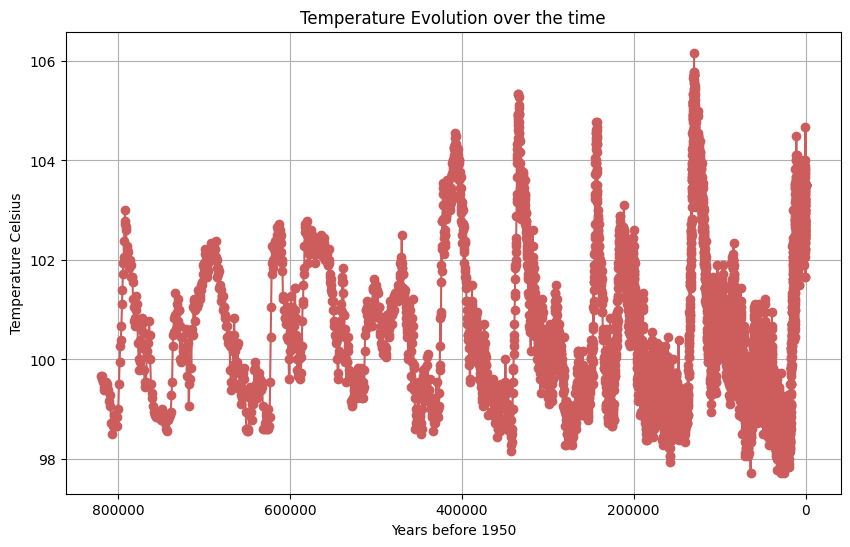

In [4]:
# Extracting data from the columns of our interest, years and temperature in Celsius degrees
temp_years = temperature_df['EDC3béta']
temperature_celsius = temperature_df['Temperature_Celsius']

# Plotting the temperature data
plt.figure(figsize=(10, 6))
plt.plot(temp_years, temperature_celsius, marker='o', linestyle='-', color='indianred')
plt.xlabel('Years before 1950')
plt.ylabel('Temperature Celsius')
plt.title('Temperature Evolution over the time')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

As I explained in the previous section, I have inverted the X-axis so that the value 0, which is the most recent year of the sample, is on the right side of the graph. 
We see how the temperature has remained in a range of values during the years 800K and 450K and how from the year 450K this range has widened, i.e., temperatures move in a wider range, having more dispersion between them and therefore greater difference between the coldest and warmest temperatures.

### 3.1.3 Temperature and CO2 Evolution


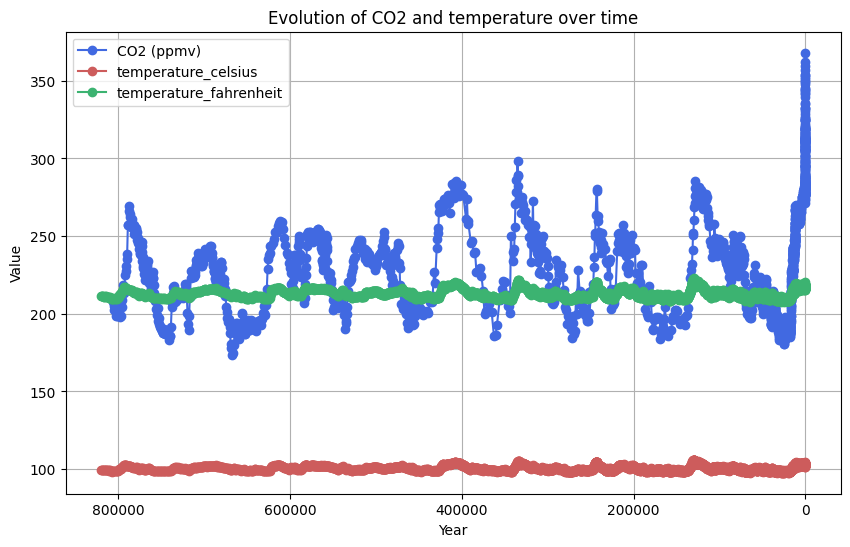

In [5]:
# Plotting both variables on the same graph
plt.figure(figsize=(10, 6))

# Plotting CO2
plt.plot(years, co2, marker='o', linestyle='-', color='royalblue', label='CO2 (ppmv)')

# Plotting temperature in Celsius degrees
plt.plot(temp_years, temperature_celsius, marker='o', linestyle='-', color='indianred', label='temperature_celsius')

# Plotting temperature in Fahrenheit degrees
temperature_fahrenheit = temperature_df['temp']
plt.plot(temp_years, temperature_fahrenheit, marker='o', linestyle='-', color='mediumseagreen', label='temperature_fahrenheit')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Evolution of CO2 and temperature over time')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

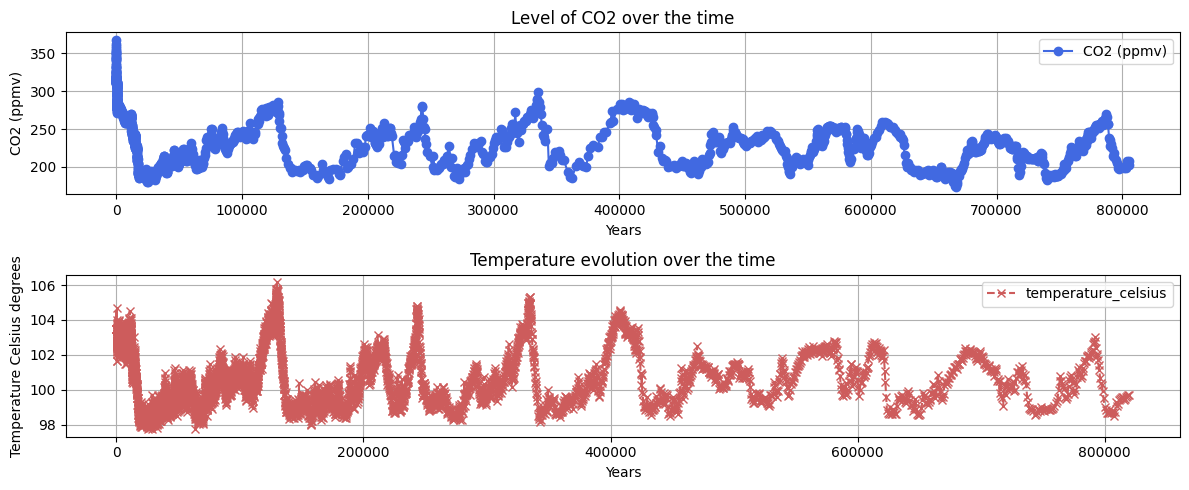

In [6]:
# Create a figure with two subplots (1 row, 2 columns) for a better correlation understanding

fig, axs = plt.subplots(2, 1, figsize=(12, 5))

# Plot for variable CO2 in the first subplot
axs[0].plot(years, co2, label='CO2 (ppmv)', color='royalblue', linestyle='-', marker='o')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('CO2 (ppmv)')
axs[0].set_title('Level of CO2 over the time')
axs[0].legend()
axs[0].grid(True)

# Plot for variable temperature in the second subplot
axs[1].plot(temp_years, temperature_celsius, label='temperature_celsius', color='indianred', linestyle='--', marker='x')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Temperature Celsius degrees')
axs[1].set_title('Temperature evolution over the time')
axs[1].legend()
axs[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Once I have analised the two variables separate, I have set a new plot with both variables in order to see their behavior during the past years and also check if there's any kind of similarity in this behavior.[11]

Looking at the last graph of both variables for the same period of years, we can see how the behavior is quite similar, when CO2 levels increase, the temperature also increases and vice versa, which, at first glance, we could deduce that there is a positive correlation between these variables.

***

### 3.2 Examine one other feature: CH4
Part of this project involves analyzing a different variable that has some kind of relationship with this climate change phenomenon, so I have decided to analyze the evolution of methane levels over the years.
To carry out the analysis of this variable, I have used a database found in [Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Springer-Nature](https://www.nature.com/articles/nature06950)

For this variable, the data found coincide with the same period of time analyzed in the previous variables, which allows a more accurate analysis to be made when comparing the behavior of all these variables.

In [7]:
# Read data from Supplementary data
ch4_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/41586_2008_BFnature06950_MOESM33_ESM.xls', skiprows=17)

print(ch4_df)

      EDC1999 depth [m]  gas age (edc3_gas_a)  CH4 mean [ppbv]   
0             99.340000                  13.4       907.000000  \
1            102.449054                 125.7       784.470000   
2            102.575000                 129.6       761.700000   
3            103.338586                 151.2       710.489633   
4            104.330000                 184.3       726.800000   
...                 ...                   ...              ...   
2098        3188.082500              794938.0       428.300000   
2099        3188.945000              796319.7       418.000000   
2100        3189.427500              797277.0       396.100000   
2101        3190.030000              798417.4       457.800000   
2102        3190.525000              799396.1       399.300000   

      1 s uncertainty  [ppbv] Bern, Grenoble  
0                        10.0              b  
1                        10.0              g  
2                        10.0              b  
3                  

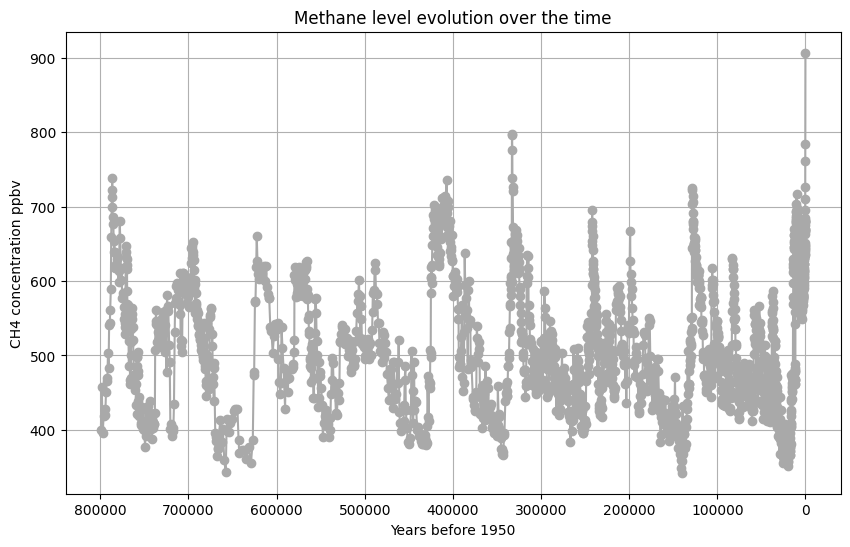

In [8]:
# Extracting data from the columns years and CH4
ch4_years = ch4_df['gas age (edc3_gas_a)']
ch4 = ch4_df['CH4 mean [ppbv]']

# Plotting CH4 data
plt.figure(figsize=(10, 6))
plt.plot(ch4_years, ch4, marker='o', linestyle='-', color='darkgray')
plt.xlabel('Years before 1950')
plt.ylabel('CH4 concentration ppbv')
plt.title('Methane level evolution over the time')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

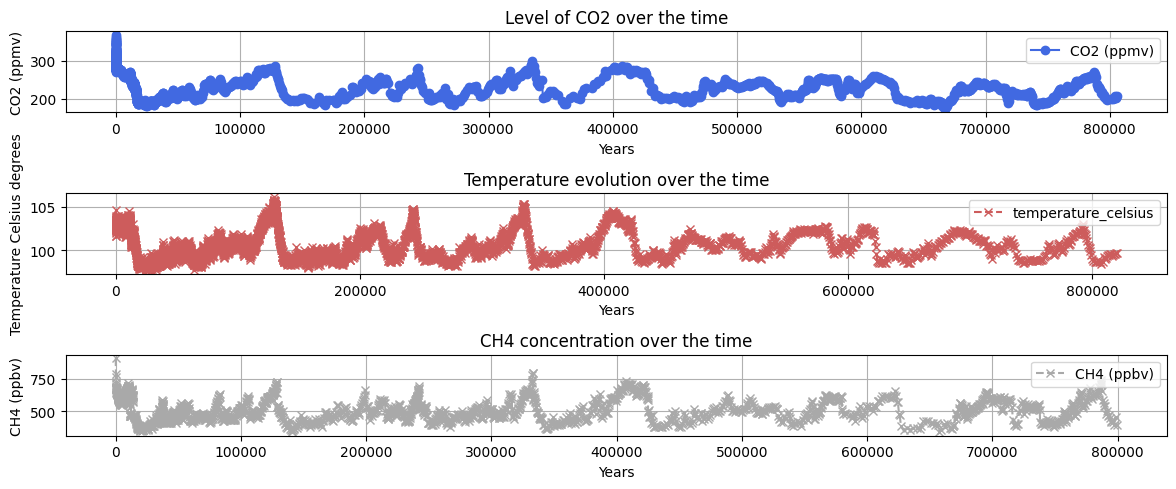

In [9]:
# Create a figure with three subplots (1 row, 3 columns) for a better correlation understanding
fig, axs = plt.subplots(3, 1, figsize=(12, 5))

# Plot for CO2 variable in the first subplot
axs[0].plot(years, co2, label='CO2 (ppmv)', color='royalblue', linestyle='-', marker='o')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('CO2 (ppmv)')
axs[0].set_title('Level of CO2 over the time')
axs[0].legend()
axs[0].grid(True)

# Plot for temperature variable in the second subplot
axs[1].plot(temp_years, temperature_celsius, label='temperature_celsius', color='indianred', linestyle='--', marker='x')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Temperature Celsius degrees')
axs[1].set_title('Temperature evolution over the time')
axs[1].legend()
axs[1].grid(True)

# Plot for CH4 variable in the third subplot
axs[2].plot(ch4_years, ch4, label='CH4 (ppbv)', color='darkgray', linestyle='--', marker='x')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('CH4 (ppbv)')
axs[2].set_title('CH4 concentration over the time')
axs[2].legend()
axs[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As I did in the previous section, I have made a graph showing the evolution of all the variables in a period of time between 800K years BP and 1950. 
We can see how the evolution is quite similar in all cases, having periods of increase of CO2 and CH4 and as a consequence of temperature and periods of time where these values have decreased in all cases. Therefore we can assume that both CO2 and CH4 and temperature are positively correlated.

***

### 3.3 Irish Context: Rainfall
The next part of the project is to analyze a variable that has reference to these changes in the climate and specifically in Ireland, that is why I decided to analyze the evolution of the level of rainfall over the years in Ireland. The database I used was the one found at [Met.ie](https://www.met.ie/climate/available-data)

In [10]:
# Reading data from original dataset
rainfall_df = pd.read_csv('/Users/stefania/PfDA/PfDA-project-2/Datasets/IOI_1711_SERIES.CSV')
rainfall_df.head()

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6


In [11]:
# Agregate the monthly data into yearly data
# Convert Month and Year to datetime format
rainfall_df['Date'] = pd.to_datetime(rainfall_df[['Year', 'Month']].assign(DAY=1))

# Group by Year and calculate the median for each year
yearly_rain_df = rainfall_df.groupby(rainfall_df['Date'].dt.year)['Median montly series'].median().reset_index()

# Rename the columns
yearly_rain_df.columns = ['Year', 'Median_yearly_rainfall']

print(yearly_rain_df)

     Year  Median_yearly_rainfall
0    1711                   79.70
1    1712                  102.70
2    1713                   78.60
3    1714                   72.95
4    1715                  107.55
..    ...                     ...
301  2012                  103.70
302  2013                   77.15
303  2014                   92.10
304  2015                  100.15
305  2016                   79.80

[306 rows x 2 columns]


Rainfall information is given by month and by year, therefore, for better analysis and data management, I have grouped these monthly data into annual data. I created a new column 'Date' in the rainfall_df DataFrame by combining the 'Year' and 'Month' columns. The 'pd.to_datetime' function was used to convert this combination of year and month to a datetime format. The 'assign(DAY=1)' ensures that a specific day (1st day of each month) is assigned to each date. 
The DataFrame 'rainfall_df'is grouped by the year extracted from the 'Date' column. It then calculates the median for each year in the 'Median montly series' column. The result is stored in the 'yearly_rain_df' DataFrame. The reset_index() function is used to convert the grouping results back into a DataFrame with a default integer index. [12]

In this case, I have used the median to group the data, as this is less sensitive to extreme values or outliers. If the dataset contains a few values that are significantly higher or lower than the rest, the median will provide a more representative measure of the "typical" value. And finally, the median is less sensitive to errors in individual data points. If there are data entry errors or outliers due to measurement errors, the median may provide a more accurate representation of the central value.

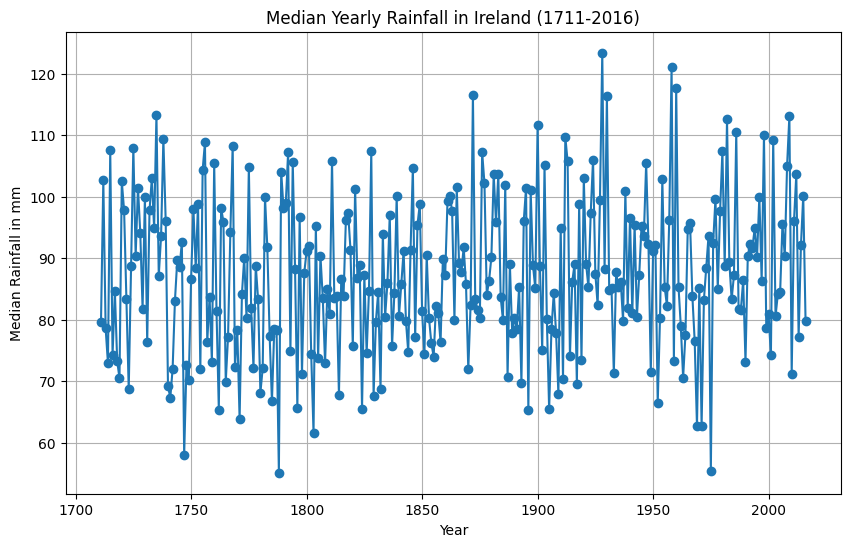

In [12]:
# Plot the median rainfall per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_rain_df['Year'], yearly_rain_df['Median_yearly_rainfall'], marker="o", linestyle="-")
plt.title('Median Yearly Rainfall in Ireland (1711-2016)')
plt.xlabel('Year')
plt.ylabel('Median Rainfall in mm')
plt.grid(True)
plt.show()

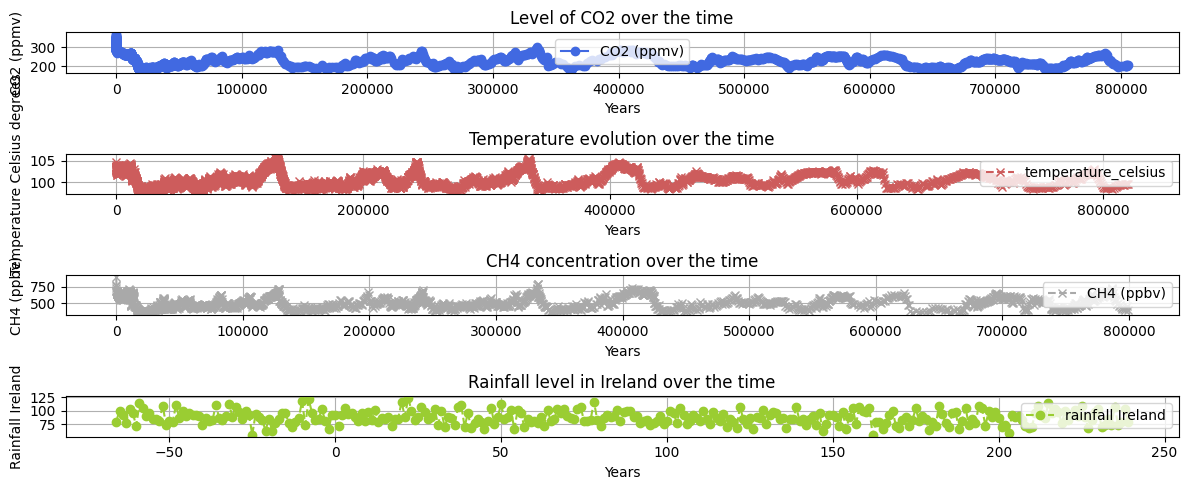

In [13]:
# Modify the years of the Rainfall variable for a better understanding in the comparison with the other variables
yearly_rain_df['Years BP'] = (1950 - yearly_rain_df['Year'])

# Create a figure with four subplots (1 row, 4 columns) for a better correlation understanding
fig, axs = plt.subplots(4, 1, figsize=(12, 5))

# Plot for CO2 variable in the first subplot
axs[0].plot(years, co2, label='CO2 (ppmv)', color='royalblue', linestyle='-', marker='o')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('CO2 (ppmv)')
axs[0].set_title('Level of CO2 over the time')
axs[0].legend()
axs[0].grid(True)

# Plot for temperature variable in the second subplot
axs[1].plot(temp_years, temperature_celsius, label='temperature_celsius', color='indianred', linestyle='--', marker='x')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Temperature Celsius degrees')
axs[1].set_title('Temperature evolution over the time')
axs[1].legend()
axs[1].grid(True)

# Plot for CH4 variable in the third subplot
axs[2].plot(ch4_years, ch4, label='CH4 (ppbv)', color='darkgray', linestyle='--', marker='x')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('CH4 (ppbv)')
axs[2].set_title('CH4 concentration over the time')
axs[2].legend()
axs[2].grid(True)

# Plot for Rainfall variable in the fourth subplot
rain_years = yearly_rain_df['Years BP']
rainfall = yearly_rain_df['Median_yearly_rainfall']
axs[3].plot(rain_years, rainfall, label='rainfall Ireland', color='yellowgreen', linestyle='--', marker='o')
axs[3].set_xlabel('Years')
axs[3].set_ylabel('Rainfall Ireland')
axs[3].set_title('Rainfall level in Ireland over the time')
axs[3].legend()
axs[3].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

As has been done in the previous sections, I have created a graph where you can see the evolution of the variables as a whole, however, nothing can be made clear in relation to the rain variable in Ireland, since that the data available for this variable is for a much shorter period of time than for the rest of the variables, therefore the comparison cannot be made over the same period of time.

***

### 3.4 Merging data
In order to merge all the data from the different variables, I have used the 'rename' method to change the name of a column in each of the three DataFrames (co2_df, temperature_df, and ch4_df). The goal is to make the column names consistent across all DataFrames, specifically renaming the columns related to years before present (Years BP). [13]

The 'pd.merge_ordered' function is used to merge the three DataFrames (co2_df, temperature_df, and ch4_df) on the 'Years BP' column using an outer join. The result is a new DataFrame named 'climate_merged_df' that contains the merged data. [14]

Finally, the merged DataFrame 'climate_merged_df' is saved to both a CSV file (merged_data.csv) and a JSON file (merged_data.json). The 'index=False' argument in the to_csv method ensures that the index is not included in the CSV file. [15]

In [14]:
# Merge the variable CO2 and Temperature in the same dataframe
# It is necessary to rename the columns, so that we will have consistent information once merged
co2_df.rename(columns={'Gasage (yr BP) ': 'Years BP'}, inplace=True)
temperature_df.rename(columns={'EDC3béta': 'Years BP'}, inplace=True)
ch4_df.rename(columns={'gas age (edc3_gas_a)': 'Years BP'}, inplace=True)

# Merge the data
climate_merged_df = pd.merge_ordered(co2_df, temperature_df, on='Years BP', how='outer')
climate_merged_df = pd.merge_ordered(climate_merged_df, ch4_df, on='Years BP', how='outer')

# Save to CSV 
climate_merged_df.to_csv('merged_data.csv', index=False)

# Save to JSON
climate_merged_df.to_json('merged_data.json', orient='records')

climate_merged_df = pd.read_csv('/Users/stefania/PfDA/PfDA-project-2/Datasets/merged_data.csv')

climate_merged_df.head(5)

,Years BP,CO2 (ppmv),sigma mean CO2 (ppmv),bag,ztop,AICC2012,deutfinal,temp,acc-EDC3beta,Temperature_Celsius,EDC1999 depth [m],CH4 mean [ppbv],1 s uncertainty [ppbv],"Bern, Grenoble"
0,-51.030000,368.022488,0.060442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-50.000000,NaN,NaN,1.0,0.0,-55.0,NaN,218.3,3.105321,103.5,NaN,NaN,NaN,NaN
2,-48.000000,361.780737,0.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-46.279272,359.647793,0.098000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-44.405642,357.106740,0.159923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interpolating and concatenating data is often necessary in situations where we have data from different sources or time periods that we want to combine into a single dataset. This also can be beneficial for analysis and visualization purposes. It allows us to work with a more comprehensive dataset that captures information from various sources.
Additionally, when creating predictive models or regression analysis, it may be necessary to have consistent values for certain variables across data sets. Interpolation can help align the data points for these variables.

So, the first step in order to do so, I extracted the columns for interpolation. The columns extracted include 'Temperature_Celsius' and 'Years BP' from 'temperature_df', and 'Years BP' and 'CO2 (ppmv)' from 'co2_df'.
The 'np.interp' function from NumPy is used to interpolate the 'Temperature_Celsius' values in 'temperature_df' based on the 'Years BP' values in 'co2_df'. The interpolated temperature values are then concatenated with the 'Years BP' and 'CO2 (ppmv)' columns from 'co2_df' to create a new DataFrame named 'temperat_co2_ch4_df'.

The same previous process has been followed for the CH4 variable, resulting in the dataframe 'temperat_co2_ch4_df'. This new interpolated dataframe has been saved into CSV and JSON file. [16]

In [15]:

# Accessing Data to interpolate and concatenate data. 
# In order to fill all the NaN values and for the data to be more consistent for further analysis, it is necessary to interpolate the data
temperature_df['Temperature_Celsius']
temperature_df['Years BP']

co2_df['Years BP']
co2_df['CO2 (ppmv)']

# Interpolating Temperature and CO2 Data
new_temp = np.interp(co2_df['Years BP'], temperature_df['Years BP'], temperature_df['Temperature_Celsius'])
temperat_co2_ch4_df = pd.concat([co2_df[['Years BP', 'CO2 (ppmv)']], pd.DataFrame(new_temp, columns=['Temp Anom Interp'])], axis=1)

# Interpolating CH4 Data
new_CH4 = np.interp(co2_df['Years BP'], ch4_df['Years BP'], ch4_df['CH4 mean [ppbv]'])
temperat_co2_ch4_df = pd.concat([co2_df[['Years BP', 'CO2 (ppmv)']], pd.DataFrame(new_temp, columns=['Temp Anom Interp']), pd.DataFrame(new_CH4, columns=['CH4 Interp'])], axis=1)

# Save to CSV 
temperat_co2_ch4_df.to_csv('temperat_co2_ch4.csv', index=False)

# Save to JSON
temperat_co2_ch4_df.to_json('temperat_co2_ch4.json', orient='records')

***

### 3.5 Linear Regressions
In statistics, linear regression is a mathematical model used to approximate the dependence relationship between a dependent variable Y and m independent variables X. This method is applicable in many situations in which the relationship between two or more variables is studied or predict a behavior.

In this case, I used a linear regression to determine the relationship between the temperature and CO2; and the temperature and CH4.

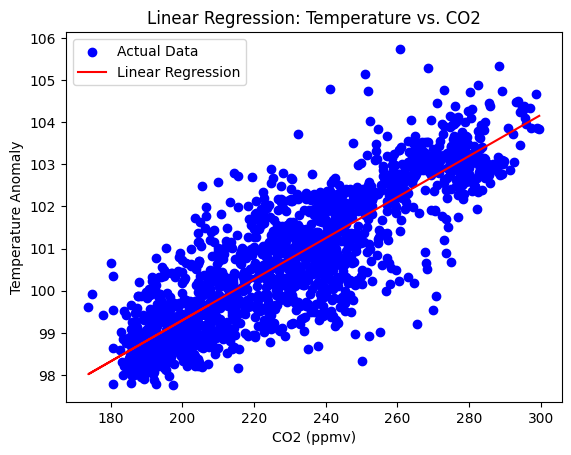

In [16]:
# Linear Regression for Temperature and CO2 (up to 44 years BP as from that there's not much info about temperature)
temp_co2_ch4_df = temperat_co2_ch4_df[temperat_co2_ch4_df['Years BP'] > 44]
X_co2 = temp_co2_ch4_df[['CO2 (ppmv)']]
y_temp = temp_co2_ch4_df['Temp Anom Interp']

# Create and train the linear regression model
model_co2 = LinearRegression()
model_co2.fit(X_co2, y_temp)

# Get the coefficients of the linear regression model
slope_co2 = model_co2.coef_[0]
intercept_co2 = model_co2.intercept_

# Visualize the regression line
plt.scatter(X_co2, y_temp, color='blue', label='Actual Data')
plt.plot(X_co2, model_co2.predict(X_co2), color='red', label='Linear Regression')
plt.xlabel('CO2 (ppmv)')
plt.ylabel('Temperature Anomaly')
plt.title('Linear Regression: Temperature vs. CO2')
plt.legend()
plt.show()

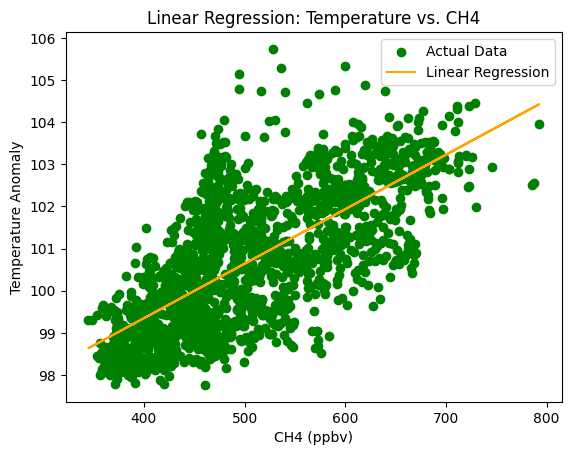

In [17]:
# Linear Regression for Temperature and CH4
temp_co2_ch4_df = temperat_co2_ch4_df[temperat_co2_ch4_df['Years BP'] > 120]
X_ch4 = temp_co2_ch4_df[['CH4 Interp']]
y_temp = temp_co2_ch4_df['Temp Anom Interp']

# Create and train the linear regression model
model_ch4 = LinearRegression()
model_ch4.fit(X_ch4, y_temp)

# Get the coefficients of the linear regression model
slope_ch4 = model_ch4.coef_[0]
intercept_ch4 = model_ch4.intercept_

# Visualize the regression line
plt.scatter(X_ch4, y_temp, color='green', label='Actual Data')
plt.plot(X_ch4, model_ch4.predict(X_ch4), color='orange', label='Linear Regression')
plt.xlabel('CH4 (ppbv)')
plt.ylabel('Temperature Anomaly')
plt.title('Linear Regression: Temperature vs. CH4')
plt.legend()
plt.show()

From the 'temperat_co2_ch4_df' DataFrame, I selected only rows where the 'Years BP' column is greater than 44. It's a way of focusing the analysis on a specific subset of data since below 44 years there's not much info about temperature. The x-axis is represented by the variable CO2 and the y-axis is represented by the temperature.
A linear regression model is created where the blue dots represent the actual data, while the red line represents the linear regression model's prediction based on the feature 'CO2 (ppmv)'. [17] [18]

The same code is applied to the case of the linear regression model between the variable CH4 and temperature.
From the graphs shown above, we can see how there is an increasing trend in both cases, the higher CO2 and CH4, the higher the temperature and the trend is increasing over the years, therefore, we can assume that in the future these values will continue to grow, as it is a growing trend.
***

### 3.6 Correlation Matrix and Heatmap
Correlation coefficients quantify the degree and direction of the linear relationship between two variables. The values range from -1 to 1, where:

- 1: Indicates a perfect positive correlation (if one variable increases, the other also increases linearly).
- 0: Indicates no linear correlation.
- -1: Indicates a perfect negative correlation (if one variable increases, the other decreases linearly).

In [18]:
# Create a correlation matrix for the variables we are analising
correlation_matrix = temperat_co2_ch4_df[['Temp Anom Interp', 'CO2 (ppmv)', 'CH4 Interp']].corr()

# Display the correlation matrix
print(correlation_matrix)

                  Temp Anom Interp  CO2 (ppmv)  CH4 Interp
Temp Anom Interp          1.000000    0.861909    0.752466
CO2 (ppmv)                0.861909    1.000000    0.882181
CH4 Interp                0.752466    0.882181    1.000000


1. Temp Anom Interp vs. CO2 (ppmv):

- Correlation Coefficient: 0.861909
- There is a strong positive correlation (0.86) between the temperature and CO2 (Carbon Dioxide concentration). This suggests that as CO2 levels increase, there is a tendency for temperature anomalies to increase as well.

2. Temp Anom Interp vs. CH4 Interp:

- Correlation Coefficient: 0.752466
- Here again we can find a positive correlation (0.75) between Temperature and CH4 (Interpolated Methane concentration). This suggests that as methane levels increase, there is a tendency for temperature to increase as well.

3. CO2 (ppmv) vs. CH4 Interp:

- Correlation Coefficient: 0.882181
- Simiar to the previous variables, in this case there is a very strong positive correlation (0.88) between CO2 (Carbon Dioxide concentration) and CH4 (Interpolated Methane concentration). This indicates that as CO2 levels increase, there is a strong tendency for methane levels to increase as well.

The correlation coefficients in the table indicate the strength and direction of the linear relationships between the mentioned variables. Positive values suggest a positive correlation (both variables tend to increase together), while negative values suggest a negative correlation (one variable tends to increase as the other decreases). In order to better viasualise this information I created a heatmap using Seaborn library and matplotlib. [19]

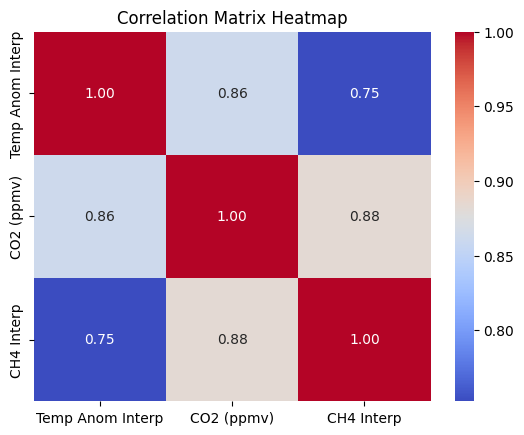

In [19]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

***
### 3.7 Temperature Prediction
To carry out the temperature prediction for the coming years, I have used a slightly more current database found at [National Aeronautics and Space Administration - NASA](https://data.giss.nasa.gov/gistemp/)
This database contains information on temperature between the years 1880 - 2022.

The first step in this case is to read the database using the 'pd.read_csv' formula. Once this is done, the next step is to split the data into training and testing sets using the 'train_test_split' function.
- Training Set (X_train, y_train): This set is used to train the linear regression model. It includes 80% of the original data.
- Testing Set (X_test, y_test): This set is reserved for evaluating the model's performance. It includes the remaining 20% of the data.
- The 'Year' column is used as the feature (X), and the 'Glob' column (global temperature) is used as the target (y).

The feature data is reshaped to be a 2D array, and the linear regression model (model) is then trained using the training data (X_train, y_train). The purpose is to fit the model to historical temperature data so that it can learn the relationship between the 'Year' (feature) and 'Glob' (target) variables. This trained model can be used to make predictions for future years. I created an array of years (years_to_predict) between 1880 - 2050 for which predictions are to be made. The linear regression model then predicts temperatures for these years, and the results are stored in predicted_temperatures. [20] [21]

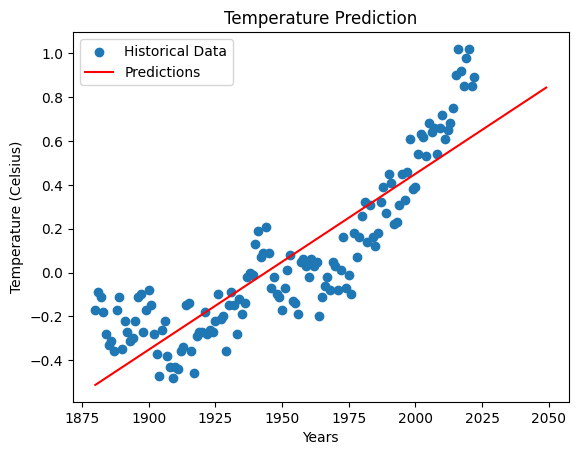

In [20]:
# In order to perform a regression I used a database with the most current temperature data from NASA source.
# Read data from NASA
glb_temp_df = pd.read_csv('/Users/stefania/PfDA/PfDA-project-2/Datasets/ZonAnn.Ts+dSST.csv')

# Dividing the data
X_train, X_test, y_train, y_test = train_test_split(glb_temp_df[['Year']], glb_temp_df['Glob'], test_size=0.2, random_state=42)

# Reshape the data to be a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions for the following years
years_to_predict = np.array([[year] for year in range(1880, 2050)])  # Adjust this range as needed
predicted_temperatures = model.predict(years_to_predict.reshape(-1, 1))

# Visualizing the results
plt.scatter(glb_temp_df['Year'], glb_temp_df['Glob'], label='Historical Data')
plt.plot(years_to_predict, predicted_temperatures, color='red', label='Predictions')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Prediction')
plt.legend()
plt.show()

As we can see in the plot above, we can see how the temperature prediction for the coming years is that it will continue to increase, and that this increase in temperature will be even greater compared to previous years.

***
## 4. Conclusion
Our climate is changing in many ways, but above all, the most notable thing is the warmer temperatures as the years go by. According to the National Oceanic and Atmospheric Administration - NOAA, global temperatures have increased more intensely since 1960.

Continuing with the temperature trend, each month on record breaks records for high temperatures compared to the same months in previous years, according to scientists at NASA's Goddard Institute for Space Studies (GISS). [22]

In the graphs previously shown throughout the development of this project, a long-term warming trend with high temperatures can be observed, as a result of human activities that release greenhouse gases such as carbon dioxide or methane into the atmosphere.

In this sense, we see how there is a clear correlation between temperature and the levels of greenhouse gases such as CO2. Thanks to the study and analysis of ice cores in Antarctica, it has been possible to evaluate the levels of CO2 in the atmosphere in past times and thus be able to compare these results with current levels.

Antartic ice cores contains air bubbles that remain trapped for thousands of years. Scientists can analyze these air bubbles and determine the levels of CO2 contained in them. Thanks to the data collected on CO2 levels, it has been observed that this greenhouse gas has an increasing trend, although also cyclical, and this is due to photosynthesis. During the spring months when everything is in bloom, CO2 levels are lower, and these are higher during the winter periods.

This increase in greenhouse gases may be due to many factors, but mainly to the greater economic and industrial activity of recent years, which have been accompanied by great improvements in people's living standards, to the detriment of the conditions climate at a global level.

***

## 5. References
[01] [Python Software Foundation. Python. (2023).](#https://www.python.org/)  
[02] [NumPy team. Numpy. (2023).](#https://numpy.org/)  
[03] [Pandas via NumFOCUS. Pandas. (2023).](#https://pandas.pydata.org/)  
[04] [Matplotlib development team. Matplotlib: Visualization with Python. (2012 - 2023).](#https://matplotlib.org/)  
[05] [Seaborn Development Team. Seaborn: Statistical Data Visualization. (2012 - 2023).](#https://seaborn.pydata.org/)  
[06] [Scikit-learn developers. scikit-learn: Machine Learning in Python. (2007 - 2023).](#https://scikit-learn.org/stable/)  
[07] [Global Monitoring Laboratory - NOAA Research. CarbonTracker CT2022. (2022).](#https://gml.noaa.gov/ccgg/carbontracker/)  
[08] [Climate.gov. Climate Change: Atmospheric Carbon Dioxide. (2023).](#https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)  
[09] [Loulergue, L., Schilt, A., Spahni, R. et al. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature 453, 383–386 (2008).](#https://doi.org/10.1038/nature06950)  
[10] [Murphy, C., Broderick, C., Burt, T. P., Curley, M., Duffy, C., Hall, J., Harrigan, S., Matthews, T. K. R., Macdonald, N., McCarthy, G., McCarthy, M. P., Mullan, D., Noone, S., Osborn, T. J., Ryan, C., Sweeney, J., Thorne, P. W., Walsh, S., and Wilby, R. L.: A 305-year continuous monthly rainfall series for the island of Ireland (1711–2016), Clim. Past, 14, 413–440 (2018).](#https://doi.org/10.5194/cp-14-413-2018)  
[11] [Matplotlib development team. Matplotlib.pyplot.subplots. (2012–2023).](#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)  
[12] [Pandas via NumFOCUS. pandas.to_datetime. (2023).](#https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)  
[13] [Pandas via NumFOCUS. pandas.DataFrame.rename. (2023).](#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)  
[14] [Pandas via NumFOCUS. pandas.merge_ordered. (2023).](#https://pandas.pydata.org/docs/reference/api/pandas.merge_ordered.html)  
[15] [Shittu Olumide. Dataframe to CSV – How to Save Pandas Dataframes by Exporting. (2023).](#https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method,format%20for%20storing%20tabular%20data)  
[16] [Pandas via NumFOCUS. pandas.DataFrame.interpolate. (2023).](#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)  
[17] [Scikit-learn developers. sklearn.LinearRegression. (2007 - 2023)](#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
[18] [Value ML. Global Warming Prediction using Machine Learning in Python](#https://valueml.com/global-warming-prediction-using-machine-learning-in-python/?utm_content=cmp-true)  
[19] [Bibor Szabo. How to Create a Seaborn Correlation Heatmap in Python? (2020).](#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)  
[20] [Gael Varoquaux. scikit-learn: machine learning in Python](#https://scipy-lectures.org/packages/scikit-learn/index.html)  
[21] [Safa Mulani.AskPython. (2020). Python predict() function – All you need to know!](#https://www.askpython.com/python/examples/python-predict-function)  
[22] [Wisconsin Department of Natural Resources. THE SCIENCE OF CLIMATE CHANGE.](#https://dnr.wisconsin.gov/climatechange/science#:~:text=Since%201880%2C%20average%20global%20temperatures,7.2%20degrees%20Fahrenheit%20by%202100.)  